In [1]:
import numpy as np
from scipy.ndimage import binary_erosion, binary_dilation
import matplotlib.pyplot as plt
from skimage import data

shape/type (328, 400) uint8


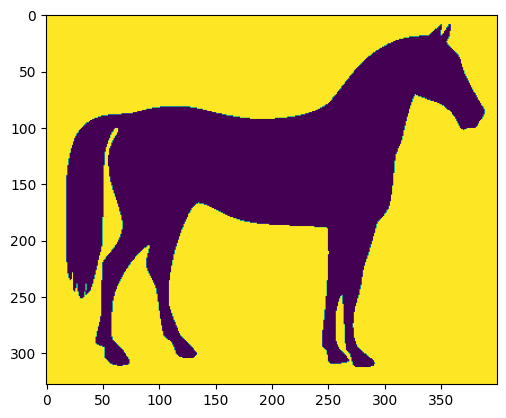

In [2]:
# Get data from skimage
img_arr = data.horse().astype(np.uint8)*255
print('shape/type', img_arr.shape, img_arr.dtype)

plt.imshow(img_arr)
plt.show()

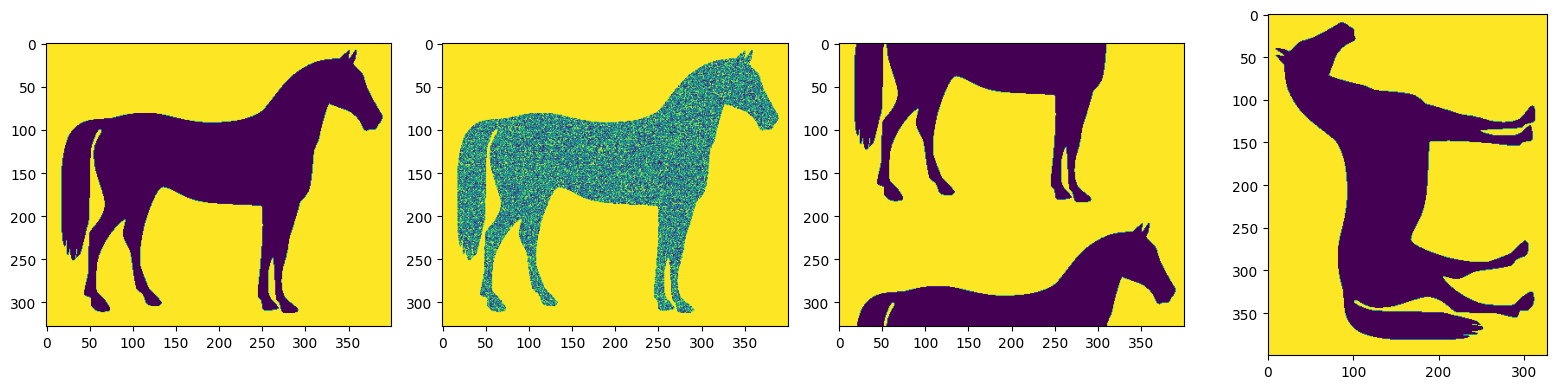

In [3]:
# Playing around with the horse
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
im = axs[0].imshow(img_arr)

tmp_arr = img_arr.copy()
noise = np.random.random(len(img_arr[img_arr < 1]))*255
tmp_arr[tmp_arr < 1] = noise
im = axs[1].imshow(tmp_arr)

tmp_arr = img_arr.copy()
tmp_arr = np.roll(tmp_arr, 200, axis=0)
im = axs[2].imshow(tmp_arr)

tmp_arr = img_arr.copy()
im = axs[3].imshow(np.rot90(tmp_arr))

fig.tight_layout()
plt.show()

In [4]:
# Numpy is a lot faster than you, use numpy
from time import time

timer = time()
big_arr = np.zeros((100,100,100))
for i in range(100):
    for j in range(100):
        for k in range(100):
            big_arr[i, j, k] += 1
print('time (slow):', time() - timer)

timer = time()
big_arr = np.zeros((100,100,100))
big_arr += 1
print('time (fast):', time() - timer)

time (slow): 0.2827482223510742
time (fast): 0.003564119338989258


In [5]:
# Slicing
arr = np.empty((100,50,75))

print('\n', 'all')
print(arr.shape)
print(arr[...].shape)
print(arr[:].shape)

print('\n', '2D')
print(arr[0,:,:].shape)
print(arr[:,0,:].shape)
print(arr[:,:,0].shape)

print('\n', '1D')
print(arr[0,0,:].shape)
print(arr[0,:,0].shape)
print(arr[:,0,0].shape)

print('\n', 'Operations')
print(np.sum(arr, axis=0).shape)
print(np.sum(arr, axis=1).shape)
print(np.sum(arr, axis=2).shape)
print(np.sum(arr, axis=-1).shape)


 all
(100, 50, 75)
(100, 50, 75)
(100, 50, 75)

 2D
(50, 75)
(100, 75)
(100, 50)

 1D
(75,)
(50,)
(100,)

 Operations
(50, 75)
(100, 75)
(100, 50)
(100, 50)


/home/rhef1902/VirtualEnvs/imn517/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/rhef1902/VirtualEnvs/imn517/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [6]:
# Broadcasting
arr_1 = np.ones((7,5))
arr_2 = np.arange(7)*2
print(arr_1, arr_1.shape)
print(arr_2, arr_2.shape, '\n')

# ------------- B1 ------------#
# (7, 5) + (7,) -> NOPE
# new_arr = arr_1 + arr_2

# ------------- B2 ------------#
# (5, 7) + (7,) -> (5, 7)
# new_arr = arr_1.T + arr_2

# ------------- B3 ------------#
# ((5, 7) + (7,)).T -> (7, 5)
# new_arr = (arr_1.T + arr_2).T

# ------------- B4 ------------#
# ((7, 5) + (5,)).T -> (7, 5)
# new_arr = arr_1 + [0,5,10,15,20]

# ------------- B5 ------------#
# (7, 5) + (1,) -> (7, 5)
new_arr = arr_1 + 1

# ------------- B6 ------------#
# (7,) + (1,) -> (7,)
new_arr = arr_2 + 1

print(new_arr, new_arr.shape)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]] (7, 5)
[ 0  2  4  6  8 10 12] (7,) 

[ 1  3  5  7  9 11 13] (7,)


In [7]:
# Stacking
arr_1 = np.ones((3,4,2))
arr_2 = np.ones((3,4))*2

# ------------- B1 ------------#
# One array is 2D and one is 3D -> NOPE
# new_arr = np.vstack([arr_1, arr_2])
# print(new_arr.shape)

# ------------- B2 ------------#
# Adding a 'fake' last dimension, but cannot stack along first 2 axis
# arr_2 = np.expand_dims(arr_2, axis=-1)
# print(arr_2.shape, arr_2.shape)
# new_arr = np.vstack([arr_1, arr_2])
# print(new_arr.shape)

# ------------- B3 ------------#
# new_arr = np.vstack([arr_1[:, :, 0], arr_2])
# print(new_arr.shape)


# ------------- B4 ------------#
for i in range(3):
    new_arr = np.stack([arr_1[:, :, 0], arr_2], axis=i)
    print(new_arr.shape)

# ------------- B5 ------------#
# arr_2 = np.expand_dims(arr_2, axis=-1)
# new_arr = np.append(arr_1, arr_2, axis=2)    
# print(new_arr.shape)

# ------------- B6 ------------#
# new_arr = np.concatenate([new_arr, arr_1, arr_2], axis=-1)
# print(new_arr.shape)


(2, 3, 4)
(3, 2, 4)
(3, 4, 2)


In [8]:
# Shallow vs Deep Copy

# ------------- B1 ------------#
# arr_1 = np.arange(100).reshape((10,10))
# arr_2 = arr_1#.copy()
# print(np.all(arr_1 == arr_2))

# arr_2[1,1] = 0
# print(np.all(arr_1 == arr_2))

# ------------- B2 ------------#
arr_1 = np.arange(100).reshape((10,10))
arr_2 = arr_1.copy()
print(np.all(arr_1 == arr_2))

arr_2[1,1] = 0
print(np.all(arr_1 == arr_2))

True
False


In [9]:
# Operations along an axis
arr_1 = np.ones((3,4,2))

# ------------- B1 ------------#
for i, arr in enumerate(arr_1):
    print(i, arr.shape, np.sum(arr))
for i in range(len(arr_1)):
    print(i, arr_1[i].shape, np.sum(arr_1[i]))
   
print()
# ------------- B2 ------------#
for i, arr in enumerate(np.rollaxis(arr_1, axis=1)):
    print(i, arr.shape, np.sum(arr))
    
for i in range(arr_1.shape[1]):
    print(i, arr_1[:,i,:].shape, np.sum(arr_1[:,i,:]))

0 (4, 2) 8.0
1 (4, 2) 8.0
2 (4, 2) 8.0
0 (4, 2) 8.0
1 (4, 2) 8.0
2 (4, 2) 8.0

0 (3, 2) 6.0
1 (3, 2) 6.0
2 (3, 2) 6.0
3 (3, 2) 6.0
0 (3, 2) 6.0
1 (3, 2) 6.0
2 (3, 2) 6.0
3 (3, 2) 6.0
